`foundation.recording` contains tables for processing recording trials and traces.

---

To fill those tables for a particular meso/reso visual scan, use the `fill` method of `VisualScanRecroding` in `foundation.recording.fill_scan`

In [1]:
from foundation.recording.fill_scan import VisualScanRecording

Connecting ewang@at-database.ad.bcm.edu:3306


In [2]:
# These are the primary key attributes for `VisualScanRecording`

VisualScanRecording.primary_key

['animal_id',
 'session',
 'scan_idx',
 'pipe_version',
 'segmentation_method',
 'spike_method',
 'tracking_method',
 'trial_filterset_id',
 'trace_filterset_id']

`animal_id`, `...`, `tracking_method` are scan identifiers and processing methods from the upstream `cajal/pipeline` respository

`trial_filterset_id` and `trace_filterset_id` are filter sets, used for filtering the scan's trials and traces, respectively.

For simplicity, let's select an empty trial filterset ...

In [3]:
from foundation.recording.trial import TrialFilterSet

trial_filter = TrialFilterSet & "members=0"
trial_filter

trial_filterset_id trial filter set,members number of members,trial_filterset_ts automatic timestamp
d41d8cd98f00b204e9800998ecf8427e,0,2023-06-29 13:30:33


... as well as an empty trace filterset

In [4]:
from foundation.recording.trace import TraceFilterSet

trace_filter = TraceFilterSet & "members=0"
trace_filter

trace_filterset_id trace filter set,members number of members,trace_filterset_ts automatic timestamp
d41d8cd98f00b204e9800998ecf8427e,0,2023-07-14 16:14:21


Since an empty filterset means that no filtering of trials or traces is performed, the `foundation.recording` tables will be filled ALL trials and traces from the scan we specify

In [5]:
# Let's fill the recording tables for the key

scan_key = {
    "animal_id": 27203,
    "session": 4,
    "scan_idx": 7,
    "pipe_version": 1,
    "segmentation_method": 6,
    "spike_method": 6,
    "tracking_method": 2,
}

(VisualScanRecording & scan_key & trial_filter & trace_filter).fill()

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


Now the following tables should be filled for the key we specified:

`ScanRecording`, `ScanTrials`, `ScanUnits`, `ScanVisualPerspectives`, `ScanVisualModulations`

`Trial`, `TrialSet`, `TrialBounds`, `TrialVideo`

`Trace`, `TraceSet`, `TraceTrials`

In [6]:
from foundation.recording.scan import ScanRecording, ScanTrials, ScanUnits, ScanVisualPerspectives, ScanVisualModulations
from foundation.recording.trial import Trial, TrialSet, TrialBounds, TrialVideo
from foundation.recording.trace import Trace, TraceSet, TraceTrials

In [7]:
# `ScanRecording` registers all of the trials (`trialset_id`) that belong to the scan recording 

scan_recording = ScanRecording & scan_key
scan_recording

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,trialset_id trial set
27203,4,7,b40cb74ee52121a49e868fe1bf5c552e


In [8]:
# Let's take a look at that trial set

TrialSet & scan_recording

trialset_id trial set,members number of members,trialset_ts automatic timestamp
b40cb74ee52121a49e868fe1bf5c552e,1180,2023-05-27 13:35:57


In [9]:
# Let's take a look at the members of that trial set

(TrialSet & scan_recording).members

trialset_id trial set,trial_id recording trial,trialset_index set index
b40cb74ee52121a49e868fe1bf5c552e,00489dd1bbea97390c848a4ae878f4c3,0
b40cb74ee52121a49e868fe1bf5c552e,005130e4ebdfec2376daf6b7c0df2d2d,1
b40cb74ee52121a49e868fe1bf5c552e,005f176d0c92fdfde18a746d9f5c5942,2
b40cb74ee52121a49e868fe1bf5c552e,006dcd9a756c46ce5de6175329fdeb40,3
b40cb74ee52121a49e868fe1bf5c552e,0078fa89853b50e00e849d4c6d55d19a,4
b40cb74ee52121a49e868fe1bf5c552e,00836d934b9409376300c711969eb883,5
b40cb74ee52121a49e868fe1bf5c552e,00873b54d1fc6fceb097605fb035738a,6
b40cb74ee52121a49e868fe1bf5c552e,008fe231d906b8243991a61a94386817,7
b40cb74ee52121a49e868fe1bf5c552e,00ccfc9dddc798ab70456188751f1001,8
b40cb74ee52121a49e868fe1bf5c552e,00e851dcf5c9d2207dbeda179637ff7f,9


In [10]:
# Let's use that to restrict the `Trial` link table

trials = Trial & (TrialSet & scan_recording).members
trials

trial_id recording trial,trial_type trial type,trial_ts automatic timestamp
00489dd1bbea97390c848a4ae878f4c3,ScanTrial,2023-05-27 13:35:48
005130e4ebdfec2376daf6b7c0df2d2d,ScanTrial,2023-05-27 13:35:48
005f176d0c92fdfde18a746d9f5c5942,ScanTrial,2023-05-27 13:35:48
006dcd9a756c46ce5de6175329fdeb40,ScanTrial,2023-05-27 13:35:48
0078fa89853b50e00e849d4c6d55d19a,ScanTrial,2023-05-27 13:35:48
00836d934b9409376300c711969eb883,ScanTrial,2023-05-27 13:35:48
00873b54d1fc6fceb097605fb035738a,ScanTrial,2023-05-27 13:35:48
008fe231d906b8243991a61a94386817,ScanTrial,2023-05-27 13:35:48
00ccfc9dddc798ab70456188751f1001,ScanTrial,2023-05-27 13:35:48
00e851dcf5c9d2207dbeda179637ff7f,ScanTrial,2023-05-27 13:35:48


In [11]:
# Let's take a look at the `ScanTrial` info

trials * Trial.ScanTrial

trial_id recording trial,trial_type trial type,trial_ts automatic timestamp,animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,trial_idx trial index within sessions
00489dd1bbea97390c848a4ae878f4c3,ScanTrial,2023-05-27 13:35:48,27203,4,7,259
005130e4ebdfec2376daf6b7c0df2d2d,ScanTrial,2023-05-27 13:35:48,27203,4,7,878
005f176d0c92fdfde18a746d9f5c5942,ScanTrial,2023-05-27 13:35:48,27203,4,7,18
006dcd9a756c46ce5de6175329fdeb40,ScanTrial,2023-05-27 13:35:48,27203,4,7,681
0078fa89853b50e00e849d4c6d55d19a,ScanTrial,2023-05-27 13:35:48,27203,4,7,757
00836d934b9409376300c711969eb883,ScanTrial,2023-05-27 13:35:48,27203,4,7,115
00873b54d1fc6fceb097605fb035738a,ScanTrial,2023-05-27 13:35:48,27203,4,7,692
008fe231d906b8243991a61a94386817,ScanTrial,2023-05-27 13:35:48,27203,4,7,972
00ccfc9dddc798ab70456188751f1001,ScanTrial,2023-05-27 13:35:48,27203,4,7,1175
00e851dcf5c9d2207dbeda179637ff7f,ScanTrial,2023-05-27 13:35:48,27203,4,7,779


In [12]:
# `ScanTrials` registers the FILTERED trials of the scan recording

ScanTrials & scan_key & trial_filter

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,trial_filterset_id trial filter set,trialset_id trial set
27203,4,7,d41d8cd98f00b204e9800998ecf8427e,b40cb74ee52121a49e868fe1bf5c552e


In [13]:
# `ScanUnits` registers the FILTERED unit traces of the scan recording

ScanUnits & scan_key & trace_filter

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,pipe_version,segmentation_method,spike_method spike inference method,trace_filterset_id trace filter set,traceset_id trace set
27203,4,7,1,6,6,d41d8cd98f00b204e9800998ecf8427e,11b1f346182c892dc5741b29fcea3e94


In [14]:
# Let's take a look at those traces

trace_set = TraceSet & (ScanUnits & scan_key & trace_filter)
trace_set

traceset_id trace set,members number of members,traceset_ts automatic timestamp
11b1f346182c892dc5741b29fcea3e94,9912,2023-07-26 14:00:30


In [15]:
# These are the members of the trace set

trace_set.members

traceset_id trace set,trace_id recording trace,traceset_index set index
11b1f346182c892dc5741b29fcea3e94,0000b167e0c898ede8434bd70ca03cd3,0
11b1f346182c892dc5741b29fcea3e94,00097aacc99d48055250244949b8bc74,1
11b1f346182c892dc5741b29fcea3e94,001a0bcef41086019fb5b60896a052e4,2
11b1f346182c892dc5741b29fcea3e94,001d03c8d71bbdc6ba4087f2c1f503b1,3
11b1f346182c892dc5741b29fcea3e94,001edf10b9c97c7b4afa249f9c004172,4
11b1f346182c892dc5741b29fcea3e94,002e7dfa014c99efab37af630fae6033,5
11b1f346182c892dc5741b29fcea3e94,002f0bbdfb6a8cea21ea423c96a1e5f7,6
11b1f346182c892dc5741b29fcea3e94,003cafa342ded75b5b87f42ca8739798,7
11b1f346182c892dc5741b29fcea3e94,004bae3f3fc18a69aea3e11c017e471e,8
11b1f346182c892dc5741b29fcea3e94,004d87fa63a3bfb29e18756af121db51,9


In [16]:
# These are the trace links

traces = Trace & trace_set.members
traces

trace_id recording trace,trace_type trace type,trace_ts automatic timestamp
0000b167e0c898ede8434bd70ca03cd3,ScanUnit,2023-05-27 13:35:49
00097aacc99d48055250244949b8bc74,ScanUnit,2023-05-27 13:35:49
001a0bcef41086019fb5b60896a052e4,ScanUnit,2023-05-27 13:35:49
001d03c8d71bbdc6ba4087f2c1f503b1,ScanUnit,2023-05-27 13:35:49
001edf10b9c97c7b4afa249f9c004172,ScanUnit,2023-05-27 13:35:49
002e7dfa014c99efab37af630fae6033,ScanUnit,2023-05-27 13:35:49
002f0bbdfb6a8cea21ea423c96a1e5f7,ScanUnit,2023-05-27 13:35:49
003cafa342ded75b5b87f42ca8739798,ScanUnit,2023-05-27 13:35:49
004bae3f3fc18a69aea3e11c017e471e,ScanUnit,2023-05-27 13:35:49
004d87fa63a3bfb29e18756af121db51,ScanUnit,2023-05-27 13:35:49


In [17]:
# Let's look at the `ScanUnit` info for those traces

traces * Trace.ScanUnit

trace_id recording trace,trace_type trace type,trace_ts automatic timestamp,animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,pipe_version,segmentation_method,unit_id unique per scan & segmentation method,spike_method spike inference method
0000b167e0c898ede8434bd70ca03cd3,ScanUnit,2023-05-27 13:35:49,27203,4,7,1,6,3276,6
00097aacc99d48055250244949b8bc74,ScanUnit,2023-05-27 13:35:49,27203,4,7,1,6,9255,6
001a0bcef41086019fb5b60896a052e4,ScanUnit,2023-05-27 13:35:49,27203,4,7,1,6,1915,6
001d03c8d71bbdc6ba4087f2c1f503b1,ScanUnit,2023-05-27 13:35:49,27203,4,7,1,6,3861,6
001edf10b9c97c7b4afa249f9c004172,ScanUnit,2023-05-27 13:35:49,27203,4,7,1,6,7796,6
002e7dfa014c99efab37af630fae6033,ScanUnit,2023-05-27 13:35:49,27203,4,7,1,6,7073,6
002f0bbdfb6a8cea21ea423c96a1e5f7,ScanUnit,2023-05-27 13:35:49,27203,4,7,1,6,9674,6
003cafa342ded75b5b87f42ca8739798,ScanUnit,2023-05-27 13:35:49,27203,4,7,1,6,4229,6
004bae3f3fc18a69aea3e11c017e471e,ScanUnit,2023-05-27 13:35:49,27203,4,7,1,6,6710,6
004d87fa63a3bfb29e18756af121db51,ScanUnit,2023-05-27 13:35:49,27203,4,7,1,6,9476,6


---

After we've filled the tables in `foundation.recording`, we can use the pipeline to flexibly generate data

For example, for the scan we just filled, let's say that we want to resample the response of a specific neuron (unit_id=100) during a specific trial (trial_idx=23) with a specific resampling method (lowpass Hamming), rate (30 hz), and offset (0)...

In [18]:
from foundation.recording.compute_trace import ResampledTrace

In [19]:
# `ResampledTrace` has a rowmethod `trial` that returns the resampled trace for the provided `trial_id`

? ResampledTrace.trial

Signature:  ResampledTrace.trial(self, trial_id)
Docstring:
Parameters
----------
trial_id : str
    key (foundation.recording.trial.Trial)

Returns
-------
1D array
    [samples] -- resampled trace
File:      /src/foundation/foundation/recording/compute_trace.py
Type:      function

In [20]:
# The primary key attributes are the following

ResampledTrace.primary_key

['trace_id', 'resample_id', 'offset_id', 'rate_id']

In [21]:
# To restrict `ResampledTrace`, let's select our trace...

trace = Trace.query("ScanUnit", dict(scan_key, unit_id=100))
trace

trace_id recording trace,trace_type trace type,trace_ts automatic timestamp
d27f86e3d593d3186e2172fb7b880fd7,ScanUnit,2023-05-27 13:35:49


In [22]:
from foundation.utility.resample import Resample, Rate, Offset

# ...and our resampling method

resample = Resample.query("LowpassHamming", 'lowpass_hz=2.5')
resample

resample_id resampling method,resample_type resample type,resample_ts automatic timestamp
4420692ba14606fb9a4869d673dd03ae,LowpassHamming,2023-05-26 11:33:01


In [23]:
# ...and our resampling rate

rate = Rate.query("Hz", 'hz=30')
rate

rate_id resampling rate,rate_type rate type,rate_ts automatic timestamp
c9f6269381328315194ae447cd7e6062,Hz,2023-06-09 21:46:21


In [24]:
# ...and our resampling offset

offset = Offset.query("MsOffset", 'ms_offset=0')
offset

offset_id resampling offset,offset_type offset type,offset_ts automatic timestamp
33dbc06858d00826c17ed7b1defa525f,MsOffset,2023-05-26 11:32:24


In [25]:
# Finally, let's select our trial

trial = Trial.query("ScanTrial", dict(scan_key, trial_idx=23))
trial

trial_id recording trial,trial_type trial type,trial_ts automatic timestamp
d5ce738e6a3a1e7d72f5812869bb68f3,ScanTrial,2023-05-27 13:35:48


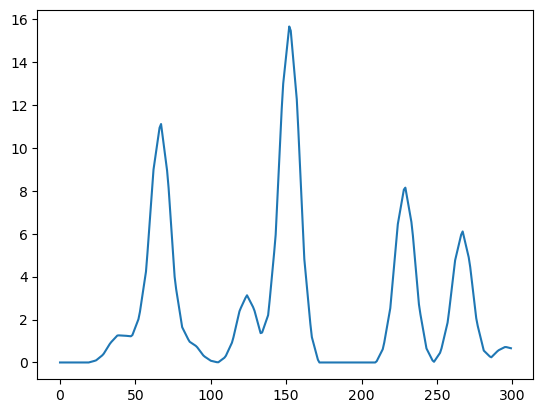

In [26]:
# With these restrictions, let's compute the resampled trace

from matplotlib import pyplot as plt

trial_id = trial.fetch1("trial_id")

trial_response = (ResampledTrace & trace & resample & offset & rate).trial(trial_id)

plt.plot(trial_response)